In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
ruta_imagen = "imagen.jpg"
imagen = cv2.imread(ruta_imagen)

In [16]:
def fast_haze_removal(image, omega=0.95, t_min=0.1, patch_size=15):
    image = image.astype(np.float32) / 255.0
    dark_channel = cv2.min(cv2.min(image[:, :, 0], image[:, :, 1]), image[:, :, 2])
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (patch_size, patch_size))
    dark_channel = cv2.erode(dark_channel, kernel)

    num_pixels = int(0.001 * image.shape[0] * image.shape[1])  # Top 0.1% pixels
    dark_vec = dark_channel.ravel()
    image_vec = image.reshape(-1, 3)
    indices = np.argsort(dark_vec)[-num_pixels:]
    A = np.mean(image_vec[indices], axis=0)  # Promedio de los top pixels

    transmission = 1 - omega * dark_channel / (A.min() + 1e-6)
    transmission = np.clip(transmission, t_min, 1)
    transmission = cv2.blur(transmission, (patch_size, patch_size))

    transmission = np.expand_dims(transmission, axis=2)
    dehazed = (image - A) / transmission + A
    dehazed = np.clip(dehazed, 0, 1)

    dehazed = (dehazed * 255).astype(np.uint8)
    return dehazed



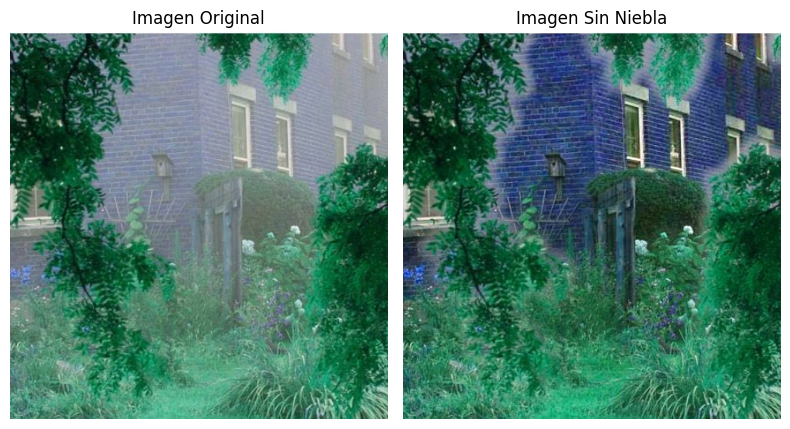

In [17]:
dehazed_image = fast_haze_removal(imagen)

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title("Imagen Original")
plt.axis("off")  # Ocultar ejes

plt.subplot(1, 2, 2)
plt.imshow(dehazed_image)
plt.title("Imagen Sin Niebla")
plt.axis("off")  # Ocultar ejes

plt.tight_layout()
plt.show()
